第六个视频主要讲了各种激活函数 + 批归一化处理 + 学习率与训练结果的关系


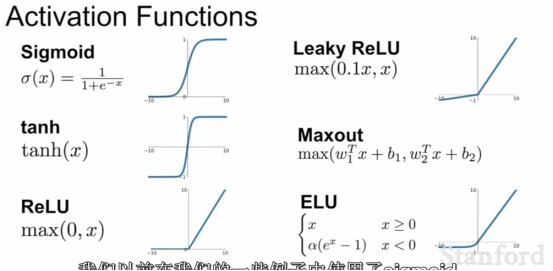

主要讲了这几种激活函数：sigmoid、tanh、relu、relu的各种变形、maxout


首先先讲了sigmoid
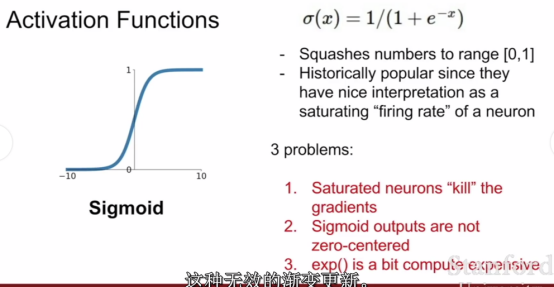
sigmoid是早期的激活函数，存在很大的缺陷：1.从图中可以看出这个激活函数在值过大或者过小的梯度是不会变的，即kil 梯度；2.这个激活函数不是以零为中心的，即这个函数输出的值的均值不是0（各层输入最好是要为0对称，即均值是0）；3.视频中说exp（）这个计算有点贵，但是我觉得相对于神经网络的计算 这个其实不算什么。

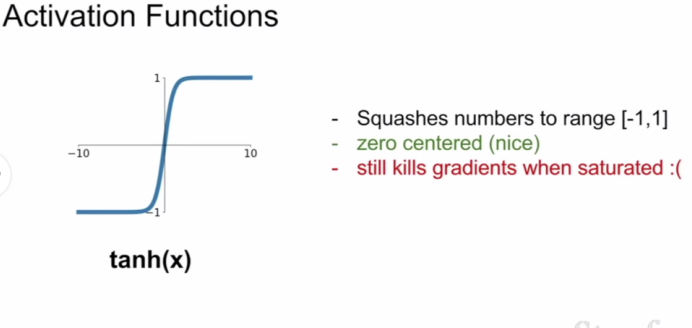
tanh是对sigmoid的改进，使其函数的输出能够以0为中心，但是还是不能解决kill 梯度的问题

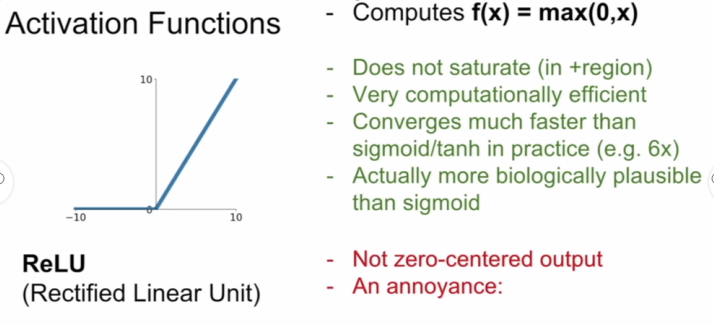
relu是目前使用较多的一个激活函数，其优点是计算方便 + 能够有效解决梯度饱和的问题；但是还是存在输出不以0为中心的缺陷

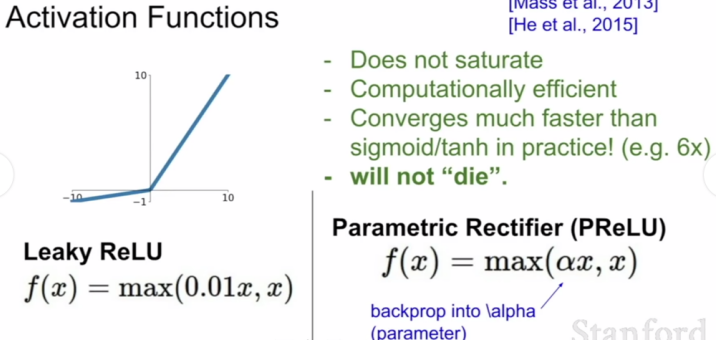
接下来讲了relu的变形式子：leaky relu + PRelu； leaky relu其实是prelu的特殊形式，其中的阿尔法也是一个需要学习的超参数

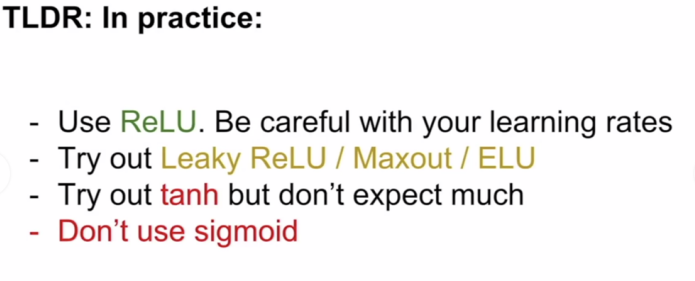
在训练时候的建议是：先用relu去训练学习率，之后可尝试relu的变形式子，tanh和sigmoid其实可以不用去尝试了。

二



数据的预处理
在图像训练的时候预处理只需要对其进行零平均即可
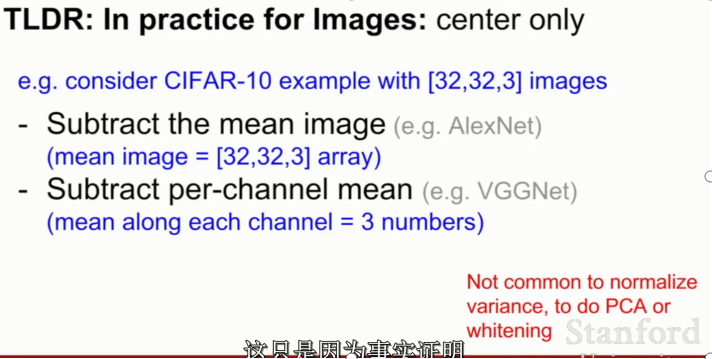
零平均的方法有两种做法：1.每张图片减去图片的平均像素值；2.每个通道的像素减去每个通道的平均像素值

三


接下来讲了权重矩阵的初始化方法


1.错误方法：将权重矩阵全部置为0去计算的
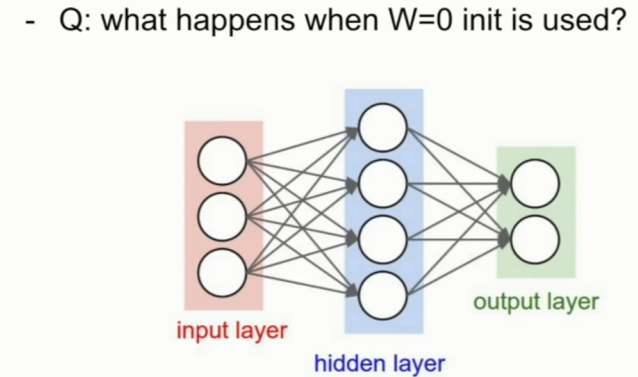
这样会导致无法进行梯度更新，不能进行训练



2.第一个适合于小型网络的方法：通过设置很小的随机数
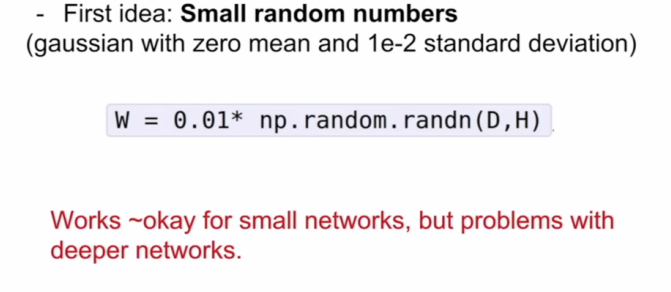
这个方法只适合于卷积层比较少的网络，当运用与深层网络时就会出问题（视频中举例了10层的网络就已经出了问题）

视频中介绍了Xavier的参数初始化方法，但是这个初始化方法不用于Relu的
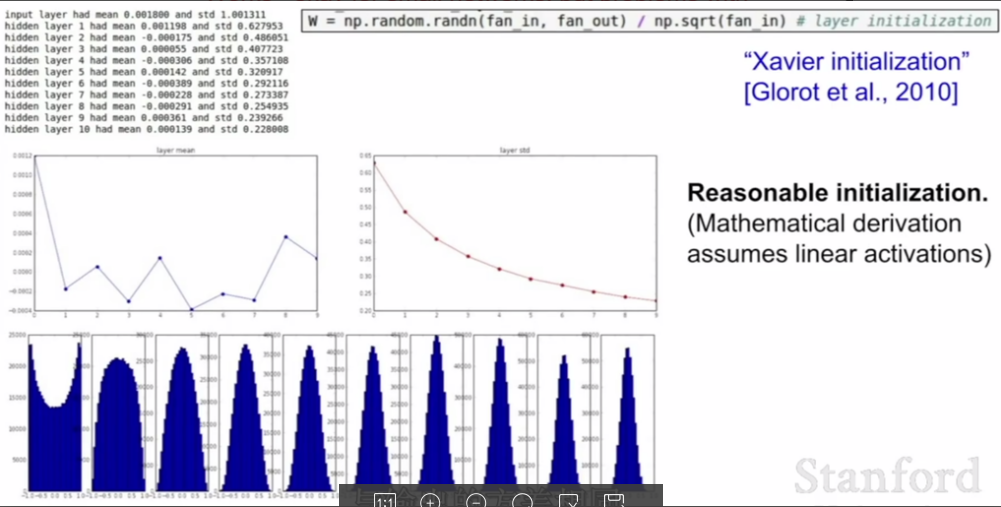
这张图片是用了tanh的激活函数，可以看见Xavier的方法还是蛮适用的

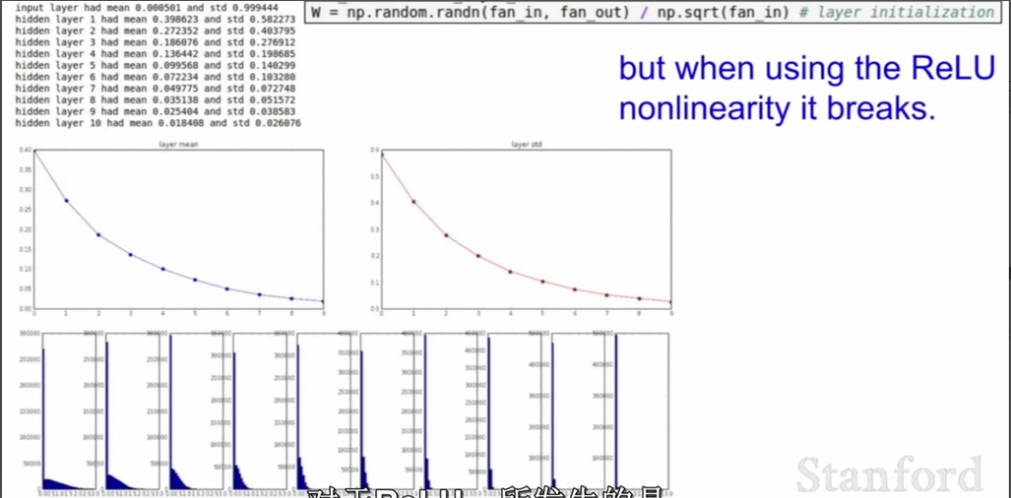
但是将Xavier方法用到Relu时，就不行了

视频中没有介绍其他的方法了，然后我就去查资料发现了一种He参数初始化方法，这是基于对Xavier的改进，将Xavier方法中方差规范化的分母改成了根号下n/2而不是根号n
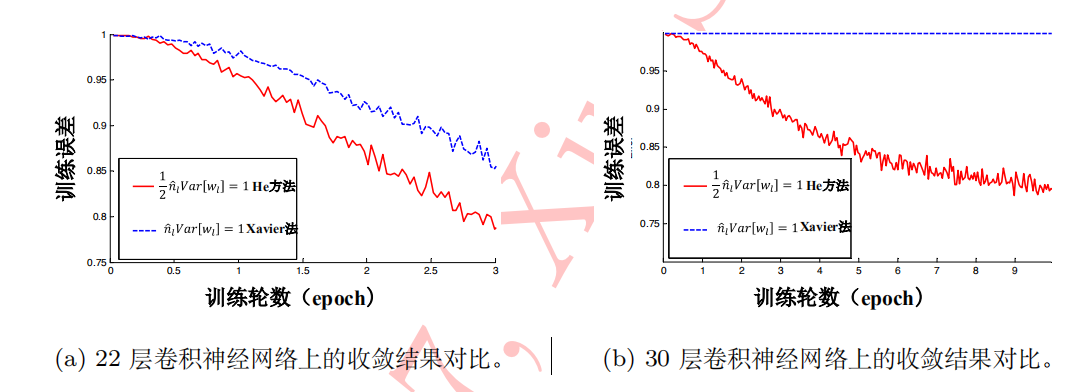
这张图是我找到的一张两种方法的对比图

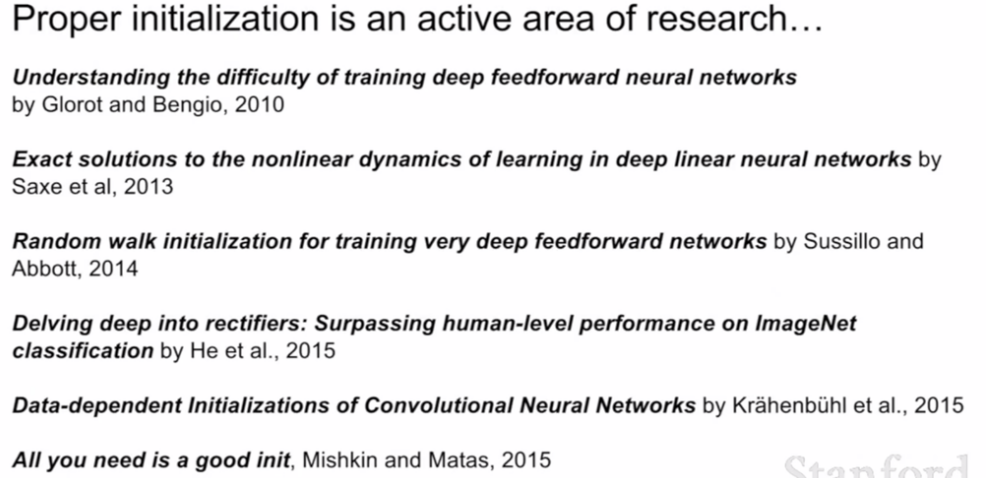
这是这边提到初始化可以关注的论文，打算回到学校之后有时间看一下

四


然后提到了批归一化，其目的是将在每次进去卷积层之前将数据进行归一化，变成均值为0，和方差归一化
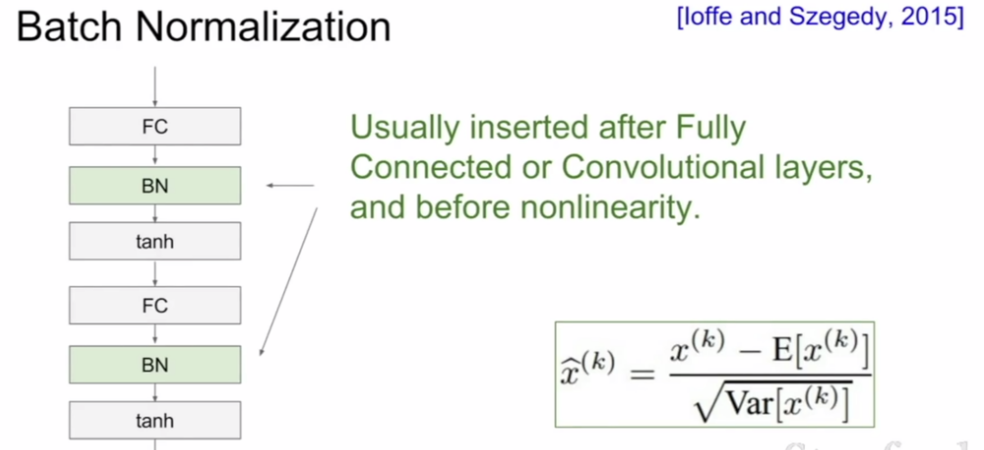
这个图中可以看见，BN一般运用与全连接层or卷积层之后，激活函数之前

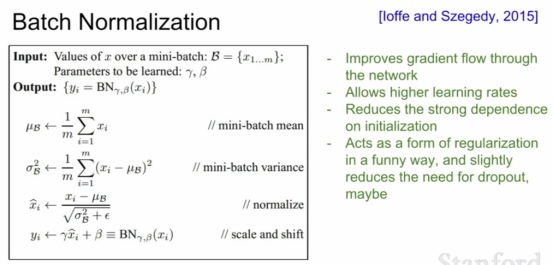
这是BN的具体步骤：1.计算均值；2.计算方差；3.归一化；4.线性偏移    其中的伽马和拜塔也是需要学习的超参数

五


之后介绍了学习率的调整方法
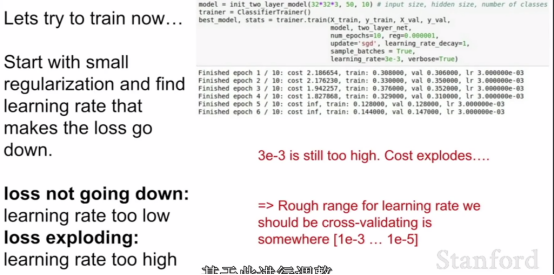
学习率太高会导致最后loss的值过大变成nan；而loss几乎没有改变说明了学习率太小，梯度更新的太慢太慢了

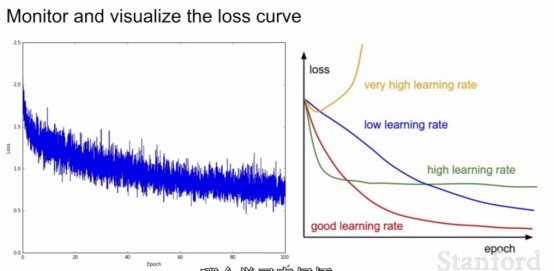
这张图明确的注出了哪些情况是由学习率怎么样引起的：1.loss飙升——学习率太大了；2.学习率缓慢下降，而且看不见尽头——学习率太小了；3.loss马上下降，但是没迭代几轮就停在一个比较高的值——学习率偏高了；4.loss逐步下降，最后停在了一个理想的值——学习率正常

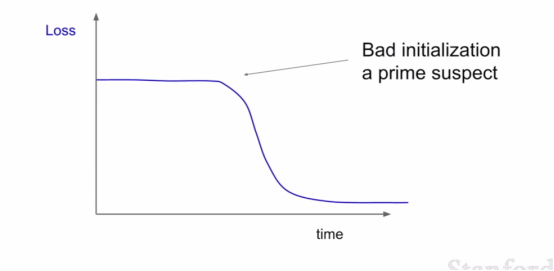
这张图中指出了：如果出现loss刚开始迭代几轮都没有变化，过了几轮后才开始逐渐减少——说明了一开始的初始化做的不好

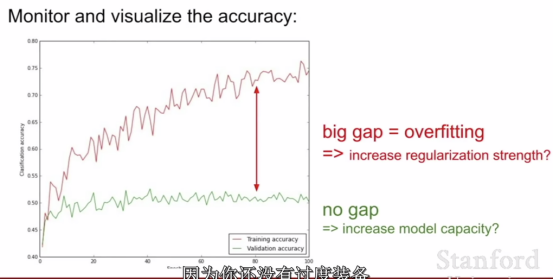
这张图中指出了当真实的value和测试时的value存在一个很大的偏差时——说明了模型过拟合了，

而当两者之间没有偏差，但是准确率却很低，说明模型欠拟合了。

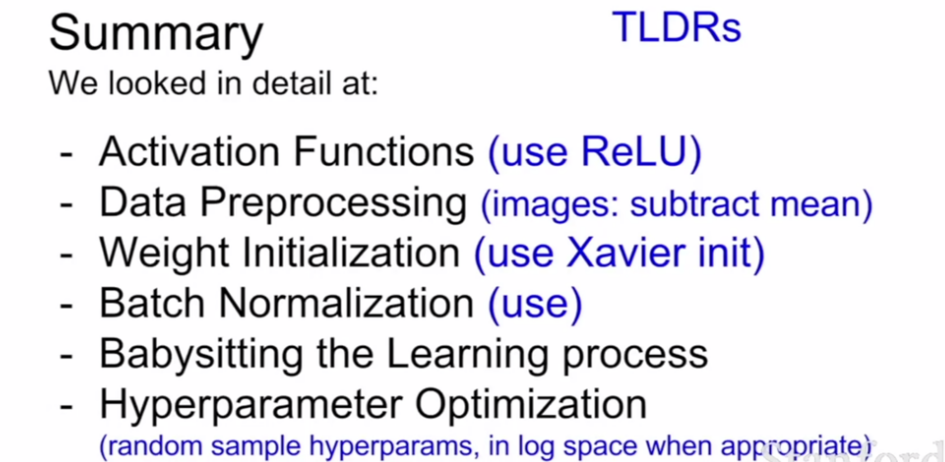
这一个视频的总结：
1.使用relu进行激活函数；2.预处理只需要进行0均值处理；3.使用Xavier方法（但是我认为使用我提到的He方法可能会好一点）；4.要使用批归一化；